In [3]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the CSV file
data_path = './Dataset/train.csv'  # Replace with the correct path to your CSV file
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print(df.head())

# Define the base directory for images
base_image_dir = './Dataset'  # Replace with the correct path to your image base directory

# Define a mapping from directory names to labels
label_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4
}

# Preprocess images and labels
def preprocess_data(df, base_image_dir, label_mapping, img_size=(224, 224)):
    images = []
    labels = []

    for index, row in df.iterrows():
        for label_name, label_num in label_mapping.items():
            img_dir = os.path.join(base_image_dir, label_name)
            img_path = os.path.join(img_dir, row['id_code'] + '.png')
            if os.path.exists(img_path):
                image = cv2.imread(img_path)
                image = cv2.resize(image, img_size)
                image = image / 255.0  # Normalize to [0, 1]
                images.append(image)
                labels.append(label_num)

    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=5)  # One-hot encode the labels (assuming 5 classes)

    return images, labels

images, labels = preprocess_data(df, base_image_dir, label_mapping)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Training data shape: (2929, 224, 224, 3)
Validation data shape: (733, 224, 224, 3)


# **The CNN MODEL**

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))  # Add a dense layer
cnn_model.add(Dense(5, activation='softmax'))  # Output layer with 5 classes (adjust as needed)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


c:\Users\ompat\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 67s 684ms/step - accuracy: 0.5923 - loss: 2.2005 - val_accuracy: 0.6944 - val_loss: 0.7814
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 57s 623ms/step - accuracy: 0.7202 - loss: 0.7415 - val_accuracy: 0.7381 - val_loss: 0.7345
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 57s 615ms/step - accuracy: 0.7339 - loss: 0.7260 - val_accuracy: 0.7312 - val_loss: 0.7626
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 57s 614ms/step - accuracy: 0.7572 - loss: 0.6920 - val_accuracy: 0.7449 - val_loss: 0.7574
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 57s 615ms/step - accuracy: 0.7519 - loss: 0.6963 - val_accuracy: 0.7353 - val_loss: 0.7663
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 658ms/step - accuracy: 0.7628 - loss: 0.6443 - val_accuracy: 0.7462 - val_loss: 0.7388
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 651ms/step - accuracy: 0.7716 - loss: 0.6179 - val_accuracy: 0.7408 - val_loss: 0.7107
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 643ms/step - accuracy: 0.7682 - loss: 0.5966 - val_accu

# **Hyperparameter Tunning**

In [6]:
# Example: Modify learning rate and optimizer
from tensorflow.keras.optimizers import Adam

# Create a new CNN model (you can reuse the existing one)
cnn_model_tuned = Sequential()
cnn_model_tuned.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model_tuned.add(MaxPooling2D((2, 2)))
cnn_model_tuned.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_tuned.add(MaxPooling2D((2, 2)))
cnn_model_tuned.add(Flatten())
cnn_model_tuned.add(Dense(128, activation='relu'))  # Add a dense layer
cnn_model_tuned.add(Dense(5, activation='softmax'))  # Output layer with 5 classes (adjust as needed)

# Compile with a different learning rate and optimizer
cnn_model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the tuned CNN model
cnn_model_tuned.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 651ms/step - accuracy: 0.5907 - loss: 3.3310 - val_accuracy: 0.7135 - val_loss: 0.7733
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 648ms/step - accuracy: 0.7098 - loss: 0.7656 - val_accuracy: 0.7244 - val_loss: 0.7605
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 57s 623ms/step - accuracy: 0.7306 - loss: 0.7302 - val_accuracy: 0.7408 - val_loss: 0.7592
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 626ms/step - accuracy: 0.7299 - loss: 0.7272 - val_accuracy: 0.7231 - val_loss: 0.7687
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 632ms/step - accuracy: 0.7564 - loss: 0.6837 - val_accuracy: 0.7394 - val_loss: 0.7706
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 634ms/step - accuracy: 0.7458 - loss: 0.6827 - val_accuracy: 0.7353 - val_loss: 0.7565
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 625ms/step - accuracy: 0.7527 - loss: 0.6527 - val_accuracy: 0.7394 - val_loss: 0.7621
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 56s 613ms/step - accuracy: 0.7680 - loss: 0.6255 - val_accu

# **Using Data Augmentation**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
# Define data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    vertical_flip=False  # No vertical flip for retinal images
)


In [9]:
datagen.fit(X_train)  # X_train: your preprocessed training images
# Example: Train your CNN model using augmented data
cnn_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))


c:\Users\ompat\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 871ms/step - accuracy: 0.5645 - loss: 1.2296 - val_accuracy: 0.7353 - val_loss: 0.7849
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 886ms/step - accuracy: 0.6939 - loss: 0.8946 - val_accuracy: 0.7312 - val_loss: 0.8315
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 892ms/step - accuracy: 0.6951 - loss: 0.8690 - val_accuracy: 0.7340 - val_loss: 0.8113
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 868ms/step - accuracy: 0.7095 - loss: 0.8180 - val_accuracy: 0.7312 - val_loss: 0.8053
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 865ms/step - accuracy: 0.7050 - loss: 0.8239 - val_accuracy: 0.7340 - val_loss: 0.7980
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 862ms/step - accuracy: 0.7154 - loss: 0.7974 - val_accuracy: 0.7299 - val_loss: 0.8075
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 860ms/step - accuracy: 0.7077 - loss: 0.7857 - val_accuracy: 0.7040 - val_loss: 0.8400
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 79s 860ms/step - accuracy: 0.7160 - loss: 0.7880 - val_accu

# **Using Transfer learning**

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from your images using VGG16
features_train = base_model.predict(X_train)
features_val = base_model.predict(X_val)

# Create an ANN model on top of VGG16 features
ann_on_vgg = Sequential()
ann_on_vgg.add(Flatten(input_shape=features_train.shape[1:]))
ann_on_vgg.add(Dense(128, activation='relu'))
ann_on_vgg.add(Dense(5, activation='softmax'))  # Assuming 5 classes

# Compile the model
ann_on_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_on_vgg.fit(features_train, y_train, epochs=10, validation_data=(features_val, y_val))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 348s 4s/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step
Epoch 1/10


c:\Users\ompat\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6271 - loss: 1.5905 - val_accuracy: 0.7271 - val_loss: 0.7931
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7364 - loss: 0.7172 - val_accuracy: 0.7271 - val_loss: 0.7385
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7697 - loss: 0.6262 - val_accuracy: 0.7558 - val_loss: 0.6656
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7915 - loss: 0.5793 - val_accuracy: 0.7449 - val_loss: 0.7098
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8044 - loss: 0.5227 - val_accuracy: 0.7531 - val_loss: 0.7238
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8184 - loss: 0.4974 - val_accuracy: 0.7653 - val_loss: 0.6716
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8266 - loss: 0.4599 - val_accuracy: 0.7640 - val_loss: 0.6552
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8486 - loss: 0.4235 - val_accuracy: 0.7599 - val_loss: 0.

# **The ANN Model**

In [11]:
# Create the ANN model
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', input_shape=(cnn_model.output_shape[1],)))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model using CNN features
ann_model.fit(cnn_model.predict(X_train), y_train, epochs=10, validation_data=(cnn_model.predict(X_val), y_val))

c:\Users\ompat\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5719 - loss: 1.2684 - val_accuracy: 0.7299 - val_loss: 0.7923
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7297 - loss: 0.7545 - val_accuracy: 0.7285 - val_loss: 0.7738
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7252 - loss: 0.7597 - val_accuracy: 0.7285 - val_loss: 0.7714
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7479 - loss: 0.7137 - val_accuracy: 0.7258 - val_loss: 0.7674
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7417 - loss: 0.7147 - val_accuracy: 0.7299 - val_loss: 0.7705
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7301 - loss: 0.7286 - val_accuracy: 0.7394 - val_loss: 0.7654
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7469 - loss: 0.7097 - val_accuracy: 0.7271 - val_loss: 0.7647
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━

# **Checking the predictions**

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


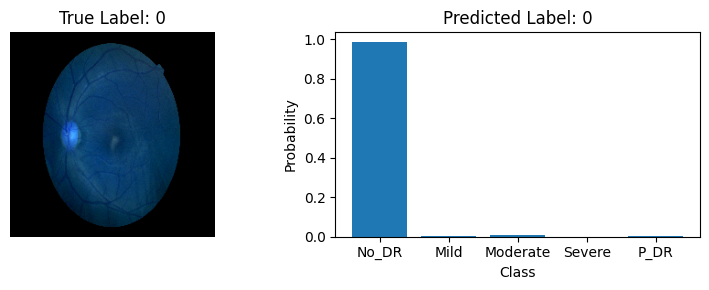

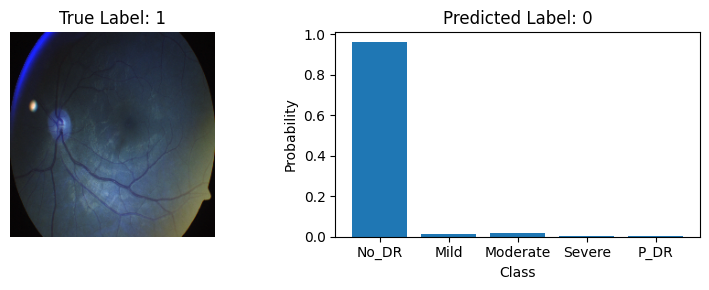

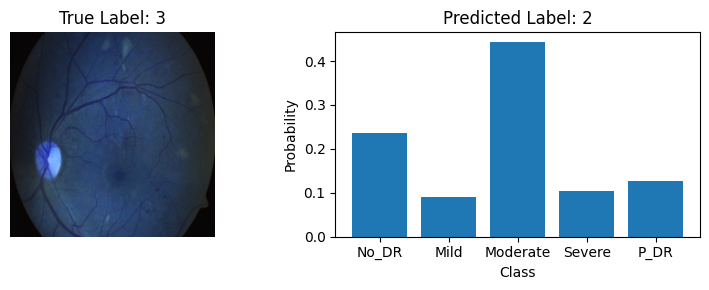

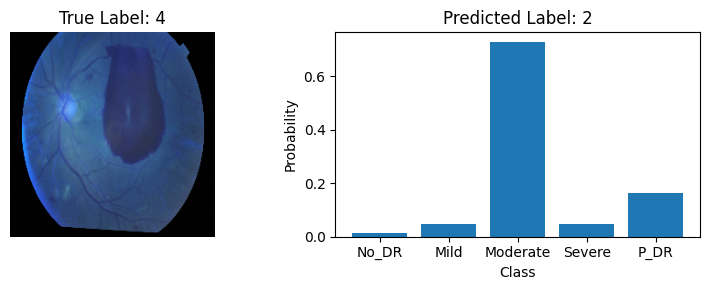

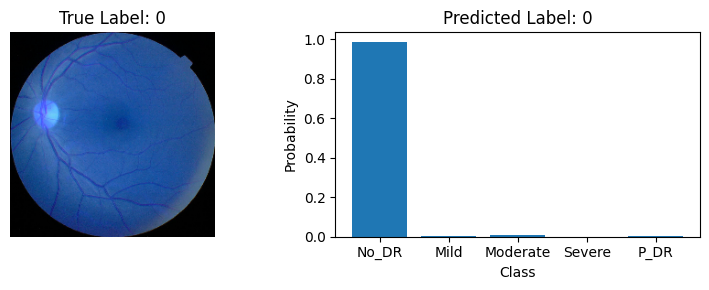

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained model (cnn_model and ann_model) already

# Get predictions for test data
cnn_predictions = cnn_model.predict(X_val)
ann_predictions = ann_model.predict(cnn_predictions)

# Convert one-hot encoded labels back to class labels
predicted_classes = np.argmax(ann_predictions, axis=1)

# Visualize a few test images along with their predicted labels
num_samples_to_visualize = 5
for i in range(num_samples_to_visualize):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(X_val[i])
    plt.title(f"True Label: {np.argmax(y_val[i])}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(5), ann_predictions[i])
    plt.xticks(range(5), ['No_DR', 'Mild', 'Moderate', 'Severe', 'P_DR'])
    plt.title(f"Predicted Label: {predicted_classes[i]}")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.tight_layout()

    plt.show()
